In [64]:
#biblioteca
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import seaborn as sns

In [32]:
#Dicionario dos nomes do dataset
nomes = ['Aracaju','Fortaleza','Natal','Recife','Salvador']

In [33]:
#Juntar todos os dados do dataset
df = pd.DataFrame()
for nome in nomes:
    cidade = pd.read_excel(f'{nome}.xlsx')
    df = df.append(cidade,ignore_index=True)

In [34]:
#Pré-visualização
df.sample(3)
df.head()
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
889,Salvador,2019-01-03,41.84,1034,1
890,Salvador,2019-01-03,126.29,1035,3
891,Salvador,2019-01-03,38.06,1036,3
892,Salvador,2019-01-03,139.64,1035,1
893,Salvador,2019-01-03,161.41,1037,3


In [35]:
#Tamanho
len(df)

894

In [36]:
#Colunas
df.columns

Index(['Cidade', 'Data', 'Vendas', 'LojaID', 'Qtde'], dtype='object')

In [37]:
#Transformando em arquivo excel

#df.to_excel('dataframe.xlsx')

## Analise do DataFrame

In [38]:
# Index da coluna data
df_index = df.set_index('Data')
df_index

,Cidade,Vendas,LojaID,Qtde
Data,,,,
2018-01-01,Aracaju,142.00,1520,1
2018-01-01,Aracaju,14.21,1522,6
2018-01-01,Aracaju,71.55,1520,1
2018-01-01,Aracaju,3.01,1521,7
2018-01-01,Aracaju,24.51,1522,8
...,...,...,...,...
2019-01-03,Salvador,41.84,1034,1
2019-01-03,Salvador,126.29,1035,3
2019-01-03,Salvador,38.06,1036,3


In [82]:
#Filtrando cidades
salvador_df = df.loc[df['Cidade'] == 'Salvador']
recife_df = df.loc[df['Cidade'] == 'Recife']
natal_df = df.loc[df['Cidade'] == 'Natal']
fortaleza_df = df.loc[df['Cidade'] == 'Fortaleza']

In [39]:
#Verificando se temos dados faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [40]:
#Filtrando uma cidade
aracaju_df = df.loc[df['Cidade'] == 'Aracaju']
aracaju_df

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8
...,...,...,...,...,...
125,Aracaju,2018-01-01,15.62,1522,2
126,Aracaju,2018-01-01,13.41,1520,7
127,Aracaju,2018-01-01,33.12,1522,9
128,Aracaju,2018-01-01,37.49,1521,2


In [41]:
#Criando a coluna de receita
aracaju_df['Receita'] = aracaju_df['Vendas'].mul(aracaju_df['Qtde'])
aracaju_df

<ipython-input-41-537bbdd47186>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aracaju_df['Receita'] = aracaju_df['Vendas'].mul(aracaju_df['Qtde'])


,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08
...,...,...,...,...,...,...
125,Aracaju,2018-01-01,15.62,1522,2,31.24
126,Aracaju,2018-01-01,13.41,1520,7,93.87
127,Aracaju,2018-01-01,33.12,1522,9,298.08
128,Aracaju,2018-01-01,37.49,1521,2,74.98


<AxesSubplot:xlabel='Data', ylabel='Receita'>

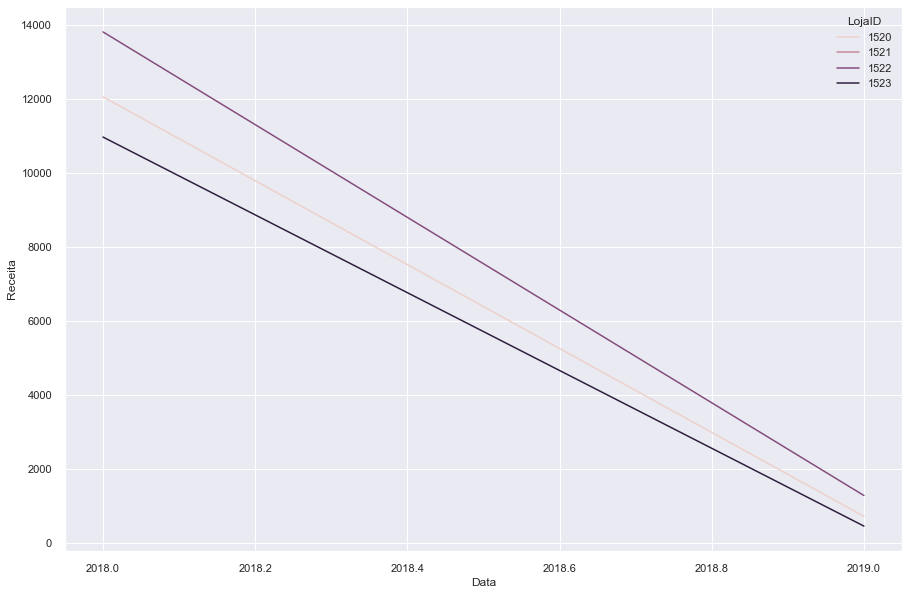

In [74]:
#Receita por ano
receita_ano = aracaju_df.groupby([aracaju_df["Data"].dt.year, "LojaID"])["Receita"].sum().reset_index()

sns.set(rc={'figure.figsize':(15,10)})
sns.set_theme(style="darkgrid")

sns.lineplot(x="Data", y="Receita",
             hue="LojaID", data=receita_ano)

In [73]:
display(receita_ano)

,Data,LojaID,Receita
0,2018,1520,12063.45
1,2018,1521,9421.48
2,2018,1522,13816.56
3,2018,1523,10974.80
4,2019,1520,724.36
5,2019,1522,1287.36
6,2019,1523,460.24


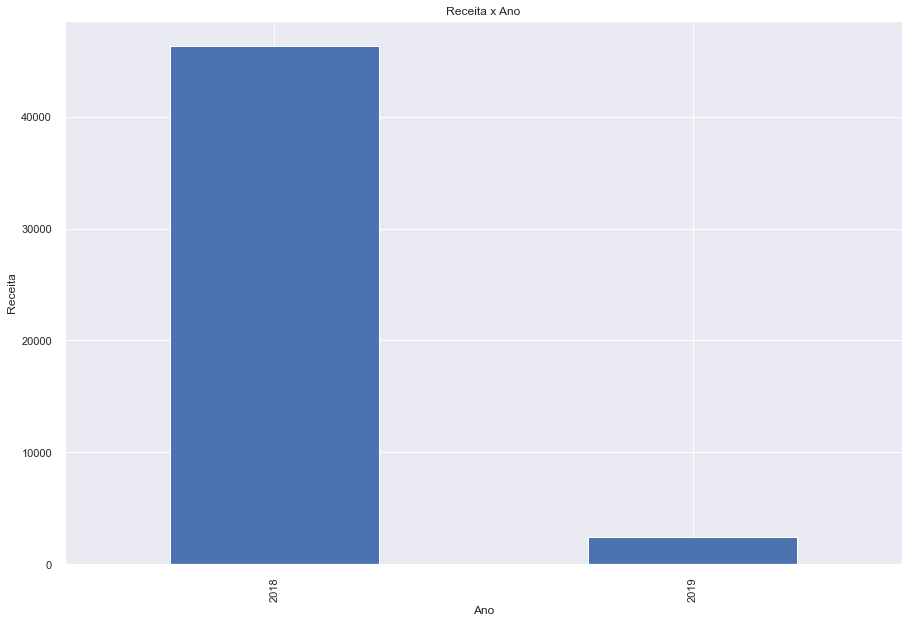

In [76]:
aracaju_df.groupby(aracaju_df["Data"].dt.year)["Receita"].sum().plot.bar(title="Receita x Ano")
plt.xlabel("Ano")
plt.ylabel("Receita");

In [78]:
venda_ano = aracaju_df.groupby([aracaju_df["Data"].dt.year, "LojaID"])["Qtde"].sum().reset_index()
venda_ano

,Data,LojaID,Qtde
0,2018,1520,193
1,2018,1521,111
2,2018,1522,207
3,2018,1523,135
4,2019,1520,12
5,2019,1522,12
6,2019,1523,4


In [84]:
aracaju_df.describe()

,Vendas,LojaID,Qtde,Receita
count,130.000000,130.000000,130.000000,130.000000
mean,72.869077,1521.461538,5.184615,374.986538
std,66.081944,1.142239,2.733044,434.671088
min,3.010000,1520.000000,1.000000,3.340000
25%,17.372500,1520.000000,3.000000,77.535000
50%,40.290000,1522.000000,5.000000,197.715000
75%,141.410000,1522.000000,7.000000,462.150000
max,237.500000,1523.000000,10.000000,1837.120000


In [86]:
df.describe()

,Vendas,LojaID,Qtde
count,894.000000,894.000000,894.000000
mean,122.611801,1074.844519,3.261745
std,166.818723,191.360735,2.096964
min,3.010000,852.000000,1.000000
25%,22.380000,983.000000,2.000000
50%,44.000000,1035.000000,3.000000
75%,160.925000,1037.000000,4.000000
max,886.000000,1523.000000,10.000000


## Analise extra

In [87]:
from pandas_datareader import data as web

In [88]:
df_acao = web.DataReader(['CVCB3.SA','SAPR11.SA'], data_source='yahoo', start='01/01/2019', end='05/01/2021')
display(df_acao)

Attributes  Adj Close                 Close                  High             \
Symbols      CVCB3.SA  SAPR11.SA   CVCB3.SA  SAPR11.SA   CVCB3.SA  SAPR11.SA   
Date                                                                           
2019-01-02  60.521698  18.635826  61.099998  20.283333  61.730000  20.299999   
2019-01-03  60.135391  19.906799  60.709999  21.666666  61.650002  21.666666   
2019-01-04  59.382584  19.842485  59.950001  21.596666  60.950001  21.983334   
2019-01-07  60.125484  19.527040  60.700001  21.253332  61.939999  21.833332   
2019-01-08  58.154320  19.447411  58.709999  21.166666  61.060001  21.446667   
...               ...        ...        ...        ...        ...        ...   
2021-04-26  23.320000  21.420000  23.320000  21.420000  23.570000  21.820000   
2021-04-27  24.639999  20.850000  24.639999  20.850000  24.750000  21.480000   
2021-04-28  25.090000  21.080000  25.090000  21.080000  25.129999  21.139999   
2021-04-29  25.000000  21.440001  25.000000  21.440001  26.590000  21.500000   
2021-04-30  23.969999  21.350000  23.969999  21.350000  25.230000  21.530001   

Attributes        Low                  Open                 Volume             
Symbols      CVCB3.SA  SAPR11.SA   CVCB3.SA  SAPR11.SA    CVCB3.SA  SAPR11.SA  
Date                                                                           
2019-01-02  60.740002  19.740000  61.189999  20.133333   3513800.0  1098300.0  
2019-01-03  60.099998  20.176666  61.500000  20.266666   2938000.0  4572600.0  
2019-01-04  59.139999  21.333332  60.450001  21.833332   1450800.0  1642200.0  
2019-01-07  60.160000  21.166666  60.540001  21.600000   2383900.0  1593900.0  
2019-01-08  58.709999  21.020000  60.860001  21.393333    979300.0   549900.0  
...               ...        ...        ...        ...         ...        ...  
2021-04-26  22.309999  21.309999  22.309999  21.719999   8957100.0  1176500.0  
2021-04-27  23.320000  20.850000  23.370001  21.450001  10045500.0  1548800.0  
2021-04-28  24.150000  20.780001  24.760000  20.950001   7414600.0  1166500.0  
2021-04-29  24.760000  20.990000  25.110001  21.110001  14250200.0  1575100.0  
2021-04-30  23.670000  21.000000  24.920000  21.299999  10431800.0  2324300.0  

[573 rows x 12 columns]

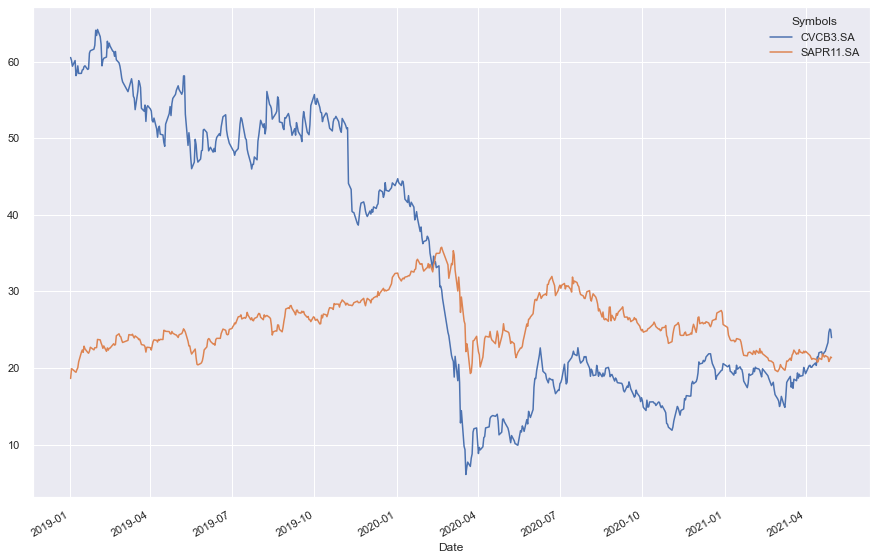

In [89]:
df_acao['Adj Close'].plot(figsize=(15,10))
plt.show()

In [91]:
df_acao.columns

MultiIndex([('Adj Close',  'CVCB3.SA'),
            ('Adj Close', 'SAPR11.SA'),
            (    'Close',  'CVCB3.SA'),
            (    'Close', 'SAPR11.SA'),
            (     'High',  'CVCB3.SA'),
            (     'High', 'SAPR11.SA'),
            (      'Low',  'CVCB3.SA'),
            (      'Low', 'SAPR11.SA'),
            (     'Open',  'CVCB3.SA'),
            (     'Open', 'SAPR11.SA'),
            (   'Volume',  'CVCB3.SA'),
            (   'Volume', 'SAPR11.SA')],
           names=['Attributes', 'Symbols'])

In [97]:
df_acao2 = df_acao.drop(columns={
    'Close', 'High', 'Open', 'Volume', 'Low'   
})
df_acao2

Attributes  Adj Close           
Symbols      CVCB3.SA  SAPR11.SA
Date                            
2019-01-02  60.521698  18.635826
2019-01-03  60.135391  19.906799
2019-01-04  59.382584  19.842485
2019-01-07  60.125484  19.527040
2019-01-08  58.154320  19.447411
...               ...        ...
2021-04-26  23.320000  21.420000
2021-04-27  24.639999  20.850000
2021-04-28  25.090000  21.080000
2021-04-29  25.000000  21.440001
2021-04-30  23.969999  21.350000

[573 rows x 2 columns]

In [115]:
df_acao2.columns

MultiIndex([('Adj Close',  'CVCB3.SA'),
            ('Adj Close', 'SAPR11.SA')],
           names=['Attributes', 'Symbols'])